In [1]:
import pyodbc
from meyerDB import cable_connection
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeavePOut
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
import sklearn.preprocessing as pp

# init db connection
conn = pyodbc.connect(cable_connection)
cursor = conn.cursor()
print('Database connection ok')

def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            try:
                value = str(round(100*field, 1)).replace('.', ',') + '%'
            except:
                value = field
            html += "<td><h4>%s</h4><td>"%(value)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

Database connection ok


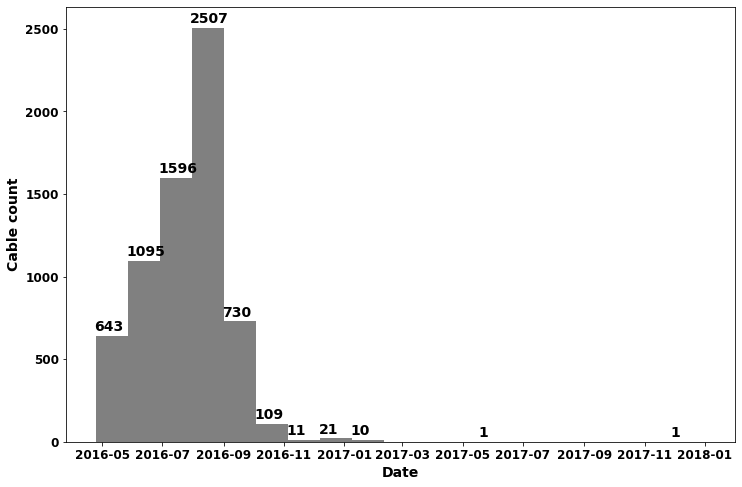

In [44]:
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'

cursor.execute("SELECT ready FROM routed WHERE project_id=1391 AND ready IS NOT NULL order by ready")
data = np.array(cursor.fetchall())
plt.figure(figsize=(12, 8))
density, bins, _ = plt.hist(data, bins=19, color='grey')
count = np.array(density).astype('int32')
outliers = []
for x,y,num in zip(bins, density, count):
    if num != 0:
        plt.text(x-2, y+30, num, fontsize=14) # x,y,str
        if num==1:
            outliers.append(x)


plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Cable count', fontsize=14, fontweight='bold')
plt.savefig('dateoutliers.png')
plt.show()